In [2]:
# EDA_Cancer_Datasets.ipynb

In [1]:
# EDA for Breast Cancer Dataset
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [ ]:
# Set the path to your dataset
dataset_path = "C:/Users/ashfa/OneDrive/Desktop/Cancer_Detection_System/datasets/breast/breast_data"
categories = ["benign", "malignant", "normal"]


In [5]:
# Count images per class
image_counts = {}
for category in categories:
    class_dir = os.path.join(dataset_path, category)
    image_counts[category] = len(os.listdir(class_dir))

In [6]:
# Show class distribution
print("\n--- Breast Ultrasound Dataset EDA ---\n")
print("Image count per class:", image_counts)
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Image Distribution by Class")
plt.show()


--- Breast Ultrasound Dataset EDA ---

Image count per class: {'benign': 891, 'malignant': 421, 'normal': 266}



Sample images from class: benign



Sample images from class: malignant


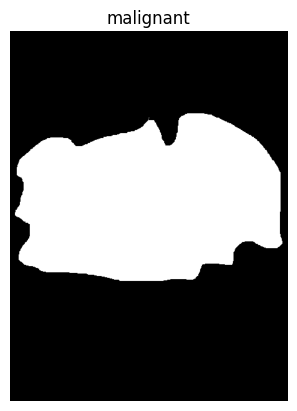


Sample images from class: normal


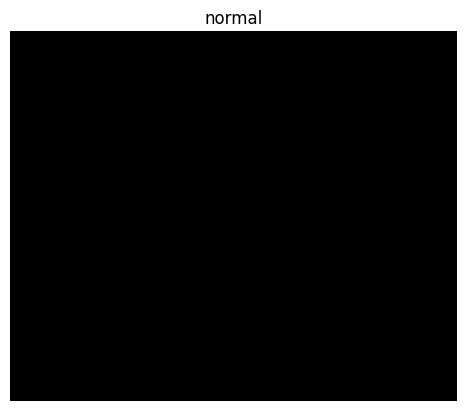

In [7]:
# Visualize sample images from each class
for category in categories:
    class_dir = os.path.join(dataset_path, category)
    sample_images = os.listdir(class_dir)[:3]
    print(f"\nSample images from class: {category}")
    for img_file in sample_images:
        img_path = os.path.join(class_dir, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Usually ultrasound images are grayscale
        if image is not None:
            plt.imshow(image, cmap='gray')
            plt.title(f"{category}")
            plt.axis("off")
            plt.show()

In [9]:
# EDA for Lung Cancer Dataset
import os
import cv2
import numpy as np


--- Lung Cancer Dataset EDA ---

Lung Cancer Class Distribution: {'benign cases': 120, 'malignant cases': 561, 'normal cases': 416}


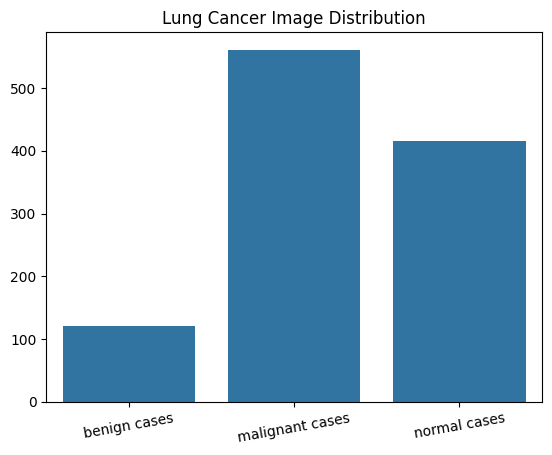

In [15]:
print("\n--- Lung Cancer Dataset EDA ---\n")
lung_dir = "C:/Users/ashfa/OneDrive/Desktop/Cancer_Detection_System/datasets/lung/lung_dataset"
classes = ["benign cases", "malignant cases", "normal cases"]
lung_counts = {}

for cls in classes:
    count = len(os.listdir(os.path.join(lung_dir, cls)))
    lung_counts[cls] = count

print("Lung Cancer Class Distribution:", lung_counts)
sns.barplot(x=list(lung_counts.keys()), y=list(lung_counts.values()))
plt.title("Lung Cancer Image Distribution")
plt.xticks(rotation=10)
plt.show()


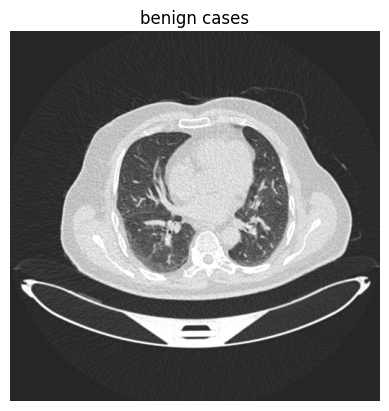

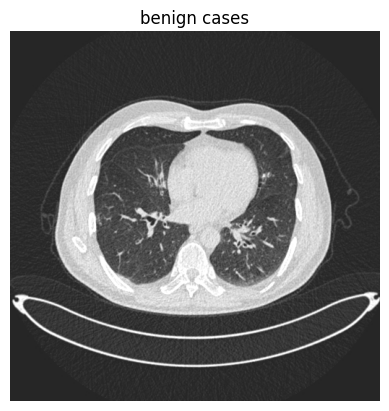

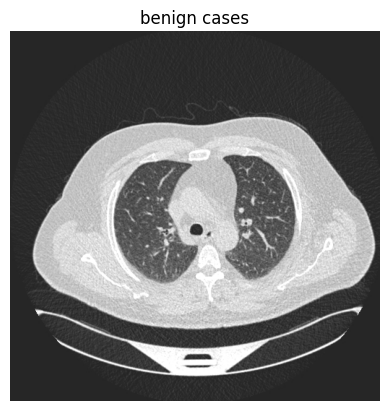

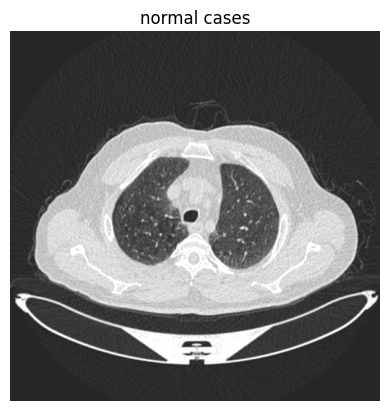

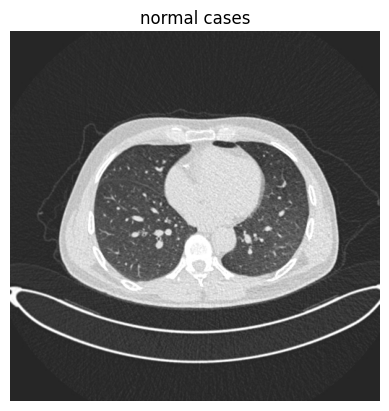

In [16]:
# Visualize few images
for cls in classes:
    img_path = os.path.join(lung_dir, cls)
    imgs = os.listdir(img_path)[:3]
    for img in imgs:
        image = cv2.imread(os.path.join(img_path, img))
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(cls)
            plt.axis("off")
            plt.show()



--- Skin Cancer Dataset EDA ---

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


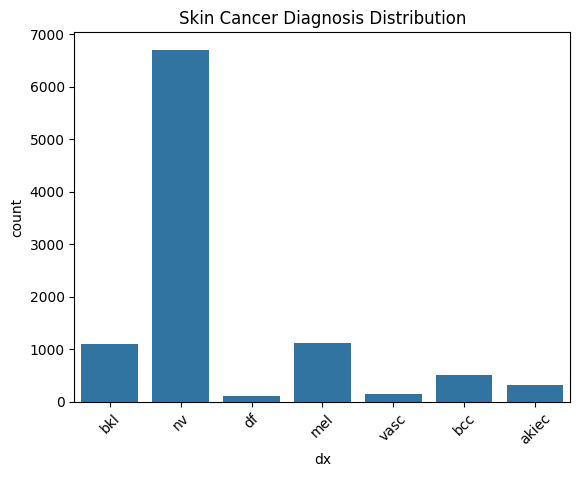

In [18]:
# EDA for Skin Cancer Dataset
print("\n--- Skin Cancer Dataset EDA ---\n")
skin_meta = pd.read_csv("C:/Users/ashfa/OneDrive/Desktop/Cancer_Detection_System/datasets/skin/HAM10000_metadata.csv")
print(skin_meta.head())
print(skin_meta["dx"].value_counts())
sns.countplot(x="dx", data=skin_meta)
plt.title("Skin Cancer Diagnosis Distribution")
plt.xticks(rotation=45)
plt.show()

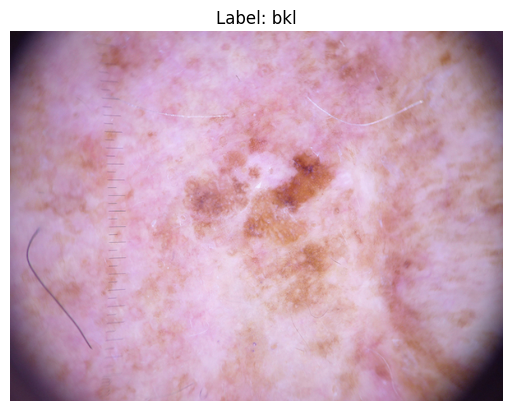

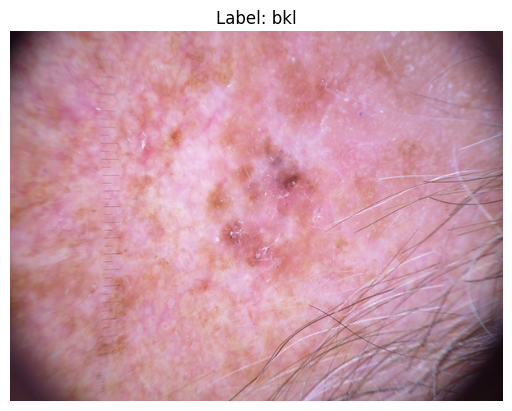

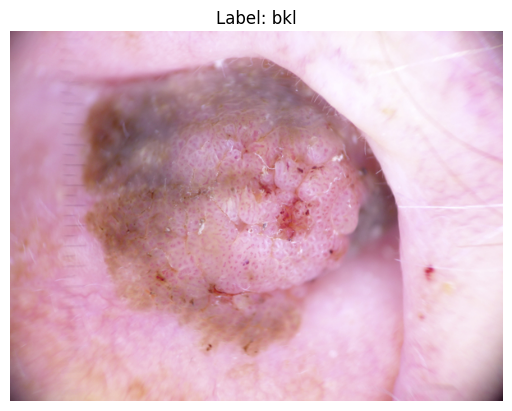

In [23]:
# Visualize image samples
img_dir = "C:/Users/ashfa/OneDrive/Desktop/Cancer_Detection_System/datasets/skin/images"  

image_map = {}
for file in os.listdir(img_dir):
    image_map[file.split(".")[0]] = os.path.join(img_dir, file)

sample_ids = skin_meta["image_id"][:5]
for img_id in sample_ids:
    img_path = image_map.get(img_id)
    if img_path and os.path.exists(img_path):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        label = skin_meta[skin_meta.image_id == img_id]["dx"].values[0]
        plt.title(f"Label: {label}")
        plt.axis("off")
        plt.show()
